#### # 학습 시 참고한 URL : https://datascienceschool.net

### # 머신러닝 모형최적화

- 머신러닝 모형이 완성된 후에는 최적화 과정을 통해 예측 성능을 향상시킬 수 있다.


- 모델에 따라서 하이퍼 파라미터가 여러개 들어가는 경우가 있는데 예를들어서 커널 서포트 벡터머신이라고 하면 커널의 종류를 고르는 거 1개, 커널 종류를 고를때도 감마라는 파라미터 1개, 그리고 원래 서포트 벡터 머신이 갖고 있는 하이퍼 파라미터(슬랙변수 가중치 등) 등 몇개가 된다.


- 최적화를 해야할 하이퍼파라미터를 잘 해주냐에 따라서 모델의 test 성능이 달라질 수 있다. 주의해야 할 점은 우리는 언제나 test 퍼포먼스 향상에 목적을 둬야 한다는 것이다. 학습 퍼포먼스를 향상시키는 방법은 정해져있다. 예를 들어서 RBF의 감마값을 엄청나게 크게 주면 된다. 그러나 이렇게 하면 오퍼피팅이 되어서 실제 테스트 퍼포먼스는 떨어질 수 있다.


- 그러면 테스트 퍼포먼스가 좋아지게 하려면 어떻게 해야하느냐. 결국에는 다 돌려볼 수 밖에 없다. Grid Searching을 하는수 밖에 없다. 우리가 쓸 수 있는 모든 값들을 다 집어넣어서 다 일일이 돌려보는 수 밖에 없다.


- 이런 작업을 도와주는 툴들이 Scikit-Learn에 아래와 같이 세가지 함수가 있다.

#### 1) validation_curve : 단일 하이퍼 파라미터 최적화

공식문서 URL : 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html

하이퍼파라미터 1개만 가지고 하는 것이다. 예를들어서 서포트 벡터머신을 써야하는데 서포트 벡터머신에서 감마값을 내가 조절을 해보고 싶다. 이 감마값에 따라 퍼포먼스가 달라질 것이라고 사용자가 가정을 했다면 아래와 같은 형식으로 함수를 돌려서 결과를 확인 할 수 있다.

아래가 사용예시이다.

In [ ]:
train_scores, test_scores = \
    validation_curve(SVC(), X, y,
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

param_range는 여기에다 집어넣을 감마값을 리스트값으로 집어넣으면 이 함수가 이것들을 하나씩 다 집어넣어서 일일이 퍼포먼스를 기록한다. 그런데 기록을 할때 한번만해서 신뢰성이 떨어질 수 있으니까 보통은 cv와 같이 kfold cross validater를 집어넣었다. 그냥 숫자를 집어넣으면 kfold를 쓰는 것이고, 우리가 cross validater를 만들어서 집어넣어도 된다. scoring은 어떤기준으로 scoring을 할것인가를 의미한다.

In [1]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)

파라미터 범위는 10의 -6승부터 10의 -1승까지 10개를 줬다. 100만분의 1부터 0.1까지 10개의 종류를 감마값으로 지정한 것이다. 보통 하이퍼 파라미터를 찾을때 쓰는 방법이 맨 처음에는 logspace를 쓰는게 보통이다. 얘가 -100만 단위에서 해야하는건지 1단위에서 해야하는건지 100만승 단위에서 해야하는건지 감이 없기 때문에 logspace를 써서 처음에는 넓은 범위로 잡는다. 넓게 잡고나서 그 다음에 조금씩 조금씩 범위를 줄여나가야한다. 그래서 하이퍼 파라미터 10개를 잡게 되면 10번을 테스트를 반복을 하게 된다. 10번을 반복하는데 각각 try마다 또 교차검증을위해 10번을 추가적으로 반복한다. 그러면 validation_curve 한번 수행하면 얘는 fitting을 100번한 것이다. 100번을 한 결과가 matrix로 나오게 된다. 10번짜리가 10개가 나오게 되는 100개의 숫자가 나오게 되는 것이다. 그 숫자가 train score와 train score로 나오게 되면 얘를 갖다 평균을 내고 분산을 내서 그림으로 그려준게 아래의 그림이다.

In [2]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y,
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=1)

Wall time: 50.2 s


위와 같이 validation_curve 함수를 돌리면 train_scores, test_scores가 나오게 된다. 

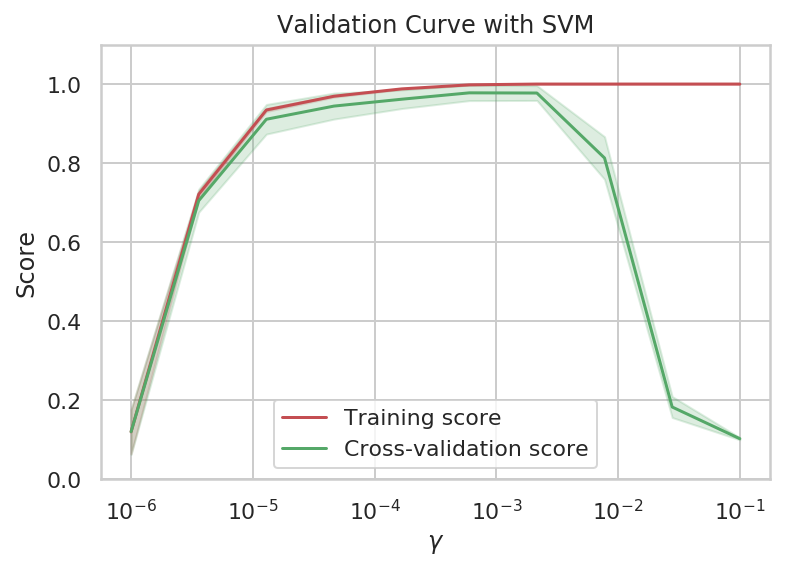

In [4]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib as mpl
import matplotlib.pyplot as plt

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean,
             label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

감마값을 크게하면 크게할 수록 점점 퍼포먼스가 좋아지다가 오버피팅이 된다. 위에 그림에서도 볼 수 있듯이 감마가 커질수록 퍼포먼스가 좋아지는게 보이다가 어느 일정 수준을 넘으면 training socre는 계속 좋아지는데(오버피팅), test 퍼포먼스는 확 떨어지게 된다. 그래서 감마는 10의 -3승과 10의 -2 사이에서 10의 -3에 가까운 숫자로 하면 되겠다 라고 의사결정을 하면 되는것이다. 그리고 다시 10의 -3과 10의 -2사이로 두고 그리드 서칭을 다시 하면 된다.

여기서 주의해야할 점은 이 모델이 이렇게 데이터가 작고 간단한 모델을 써도 잘되는 쉬운문제는 모양이 위와같이 깨끗하게 나오는데 이런식으로 모양이 안나오는 경우는 첫번째로 일단 이 모델이 제대로 피팅이 된건지 확인을 해야한다. 이 모델에 들어간 하이퍼 파라미터 값을 직접 집어넣어보는 등 수동으로 confusion 메트릭스도 보고 이모델이 제대로 된 모델인지 다시 확인해봐야한다.

그래서 위와 같은 깨끗한 모양이 나올때까지 모델을 전면적으로 재확인하고 하이퍼파라미터 범위를 다시잡는 등을 해줘야한다.

validation_curve는 딱하나의 하이퍼파라미터에 대해서만 하는건데 대부분의 모델들은 하이퍼파라미터가 복수개다. 

복수개일 경우에는 GridSearchCV라는 명령어를 쓰면 된다.

#### 2) GridSearchCV : 그리드를 사용한 복수 하이퍼 파라미터 최적화

공식문서 URL : 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

얘는 GridSearchCV 함수 안에다가 우리가 하려고하는 모델을 estimator로 집어넣고, 파라미터를 아래와 같이 딕셔너리로 집어넣어주면 된다. 아래 예시는 우리가 찾으려고 하는 모델 자체가 파이프라인으로 만들어졌다. 이 파이프라인 안에 들어가는 파라미터 값 2개에 대해 구별하기 위해 'scl','clf' 파이프라인에 들어가는 요소 앞에 붙어있는 이것들이 param_grid 에 넣을때 앞에들어가는 prefix가 된다. 그리고 언더스코어 두개가 쳐지고, 실제로 이 모델안에 들어가는 아규먼트 이름이 들어간다.

그리고 여기에는 param_grid에는 딕셔너리가 두개가 들어가 있다. 왜냐하면 여기에 있는 rbf 커널값이 linear일때와 rbf일때랑은 주는 아규먼트가 다르기 때문에 각각의 경우에 따라 각각 둔 것이다. 

이런식으로 나머지는 validation_curve와 비슷하게 넣어주면 된다.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=1)

%time gs = gs.fit(X, y)

그러면 얘는 모델피팅을 몇번하는 것인가. 일단 얘는 parameter range가 8개이다. 첫번째는 linear 커널일때 8개 케이스를 비교하는 것이고, 두번째는 rbf 커널일때 'clf__C' 8개, 'clf__gamma': 8개 이기 때문에 64개의 조합을 다 해본다. 총 72개의 모델을 테스트 한 것이다. 그런데 테스트를 10번했기 때문에 총 720번 테스트 한 것이다.

그리고 얘는 result로 각각의 케이스를 썼을때 쓴 케이스와 이것들의 평균 스코어도 내준다. 그런데 이것도 너무 믿을 필요가 없다. 왜냐하면 아까처럼 아예 여기에 있는 하나하나의 모델들이 제대로 피팅이 안되어 있을 케이스도 있기 때문이다. 그래서 위의 깨끗한 모양이다. 그러면 모르겠는데 이게 울퉁불퉁하고 지저분하게 곡선이 나오면 이 모델 하나하나가 제대로 피팅이 안되어 있을 가능성이 높다. 하나하나 잘 되었는지 확인하고 돌려야 한다. 

또한 gs.best_score_, gs.best_params_ 를 통해 베스트 스코어를 자동으로 찾아주기는 한다. 이것도 너무 믿으면 안될게 곡선모양이 평평한 편의 경우에는 얼마안되는 차이중에서 가장 높은 걸 찾기 때문에 우리가 직접 surface contour plot 같은것을 그려서 눈으로 확인하는 것이 제일 확실하다.

#### 3) ParameterGrid : 복수 파라미터 최적화용 그리드

공식문서 URL :

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html

얘는 파라미터를 조합하여 탐색 그리드를 생성해 준다. ParameterGrid 는 탐색을 위한 iterator 역할을 한다. 이게 왜 필요하냐면 여기에서는 GridSearchCV라는 사이킷런에서 제공하는 함수를 썼지만, 경우에 따라서는 우리가 이 도구를 직접 만들어서 써야할 경우도 있다. 예를들어서 사이킷런은 분산컴퓨팅이 안된다. 여러대의 컴퓨터를 동시에 쓸 수가 없다. 여러대의 컴퓨터를 쓸 경우에는 계산을 조금 더 빨리 할 수 있다. 그런데 GridSearchCV 함수를 병렬 컴퓨팅을 할 수 없으니까 우리가 직접 특정컴퓨터에 파라미터를 나누어주고, 테스트까지 해야할 일이 있을 수도 있다. 그럴때 모델을 만들때는 파라미터 그리드라는 것을 쓰면된다.

아래는 ParameterGrid 사용예시이다.

In [5]:
from sklearn.model_selection import ParameterGrid

param_grid = {'a': [1, 2], 'b': [True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [6]:
param_grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1, 10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

사이킷런에서 분산처리는 안되지만 병렬처리까지는 가능하다. 병렬처리는 컴퓨터 한대에서 컴퓨터 한대가 가지는 코어수만큼 프로세스를 만들어서 이 프로세스를 동시에 돌리는 것을 말하고, 분산처리는 이거를 더 확장해서 컴퓨터 자체를 여러대로 돌리는 것이다.

GridSearchCV 명령에는 n_jobs 라는 인수가 있다. 디폴트 값은 1인데 1인경우는 병렬처리를 안하고 프로세스 하나로 돌리겠다는 것이다. 이 값을 증가시키면 내부적으로 멀티 프로세스를 사용하여 그리드서치를 수행한다. 만약 CPU 코어의 수가 충분하다면 n_jobs를 늘릴 수록 속도가 증가한다. n_jobs의 최대값은 연산을 하고자하는 컴퓨터의 코어수이다. 실제 하드웨어의 코어 수가 부족하다면 병렬로 실행되지 않으므로 실행시간이 단축되지 않는다. 그래서 보통 n_jobs에 숫자를 부여하는 기준은 내 컴퓨터의 코어수에서 하나정도를 뺀 숫자를 주는 것이 안전하다. 하나는 왜 빼냐면 알고리즘에 따라서는 컴퓨팅을 할때 cpu를 풀로 잡아먹는 애가 있다. 그래서 이런 알고리즘에 내 코어를 다 줘버리게 되면 마우스나 키보드 자체가 아예 안먹을 수도 있다. 그래서 통신을 해서 작업을 돌리면 이 컴퓨터가 통신이 끊어진건지, 문제가 생긴건지 알 수가 없다.

n_jobs를 2로 했을때가 n_jobs를 1로 했을때보다 그러면 시간이 정확하게 1/2로 단축되는거냐. 그렇지 않다. 왜냐하면 병렬처리를 하려면 맨처음에 작업을 몇개로 쪼개서 나누어주는 배분작업을 해주고, 또한 동시에 연산을 시작해도 동시에 끝난다는 보장이 없기 때문에 먼저 끝나는 연산이 있어도 맨마지막에 연산이 끝나는 애까지 기다려줘야한다. 그래서 이런거를 고려했을때 약 1.5배 수준으로 더 빨라진다.

사이킷런을 쓰면서 분산처리해주는 도구가 있기는 있다. 그러나 쉽지는 않다. 왜냐하면 분산처리를 하려면 이 각각의 mode들을 갖다 다 똑같은 환경으로 setting 해줘야 한다. 그리고 이런식으로 하는 가장 좋은 방법은 도커를 쓰면 된다. 